In [110]:
import pandas as pd
import json
import numpy as np
import ast

## Merge data

In [161]:
song_data = pd.read_csv('data/spotify_api/data.csv')
song_rankings = pd.read_csv('data/spotify_rankings/data.csv')

In [162]:
song_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [163]:
song_rankings.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [164]:
song_data['artist'] = song_data['artists'].apply(lambda x : ast.literal_eval(x)[0])
song_data = song_data.drop_duplicates(subset=['name', 'artist'])

In [165]:
len(song_data)

155467

In [233]:
merged_data = pd.merge(song_rankings, song_data, how='left', left_on=['Track Name', 'Artist'], right_on=['name', 'artist'])

In [235]:
len(song_rankings), len(merged_data)

(3441197, 3441197)

In [236]:
merged_data = merged_data.drop(columns=['artists', 'artist', 'name', 'URL', 'year']).dropna().reset_index(drop=True)

In [237]:
len(merged_data)

1861781

In [238]:
merged_data.columns = [x.lower().replace(' ', '_') for x in merged_data.columns]

In [239]:
merged_data.head()

,position,track_name,artist,streams,date,region,acousticness,danceability,duration_ms,energy,...,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,0.4000,0.761,222560.0,0.838,...,0.000000,4.0,0.176,-3.073,0.0,74.0,2016-08-26,0.0502,93.974,0.710
1,5,Safari,J Balvin,14269,2017-01-01,ec,0.4830,0.663,204973.0,0.727,...,0.000000,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.2600,133.679,0.513
2,6,La Bicicleta,Carlos Vives,12843,2017-01-01,ec,0.2100,0.745,229510.0,0.944,...,0.000001,0.0,0.333,-3.959,1.0,72.0,2017-11-10,0.1340,179.991,0.951
3,7,Ay Mi Dios,IAmChino,10986,2017-01-01,ec,0.1670,0.761,252003.0,0.829,...,0.000000,0.0,0.189,-3.203,0.0,69.0,2016-02-22,0.0681,92.033,0.813
4,8,Andas En Mi Cabeza,Chino & Nacho,10653,2017-01-01,ec,0.0244,0.671,247493.0,0.954,...,0.000000,9.0,0.111,-1.870,1.0,71.0,2016-02-19,0.1300,104.114,0.556


In [ ]:
merged_data.to_csv('data/spotify_merged_data.csv', index=False)

## Visualizations

In [195]:
import matplotlib.pyplot as plt
import datetime

##### Groupby song

In [203]:
song = merged_data[merged_data['Track Name'] == 'Safari']

In [204]:
song.sort_values('Date')

,Position,Track Name,Artist,Streams,Date,Region,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
1,5,Safari,J Balvin,14269,2017-01-01,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1446726,3,Safari,J Balvin,29805,2017-01-01,co,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1272715,3,Safari,J Balvin,141575,2017-01-01,es,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1227754,5,Safari,J Balvin,10784,2017-01-01,uy,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1198291,3,Safari,J Balvin,8307,2017-01-01,pa,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560873,177,Safari,J Balvin,13990,2018-01-09,cl,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
496142,145,Safari,J Balvin,2618,2018-01-09,cr,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1198285,195,Safari,J Balvin,42715,2018-01-09,mx,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1486960,127,Safari,J Balvin,5627,2018-01-09,co,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0


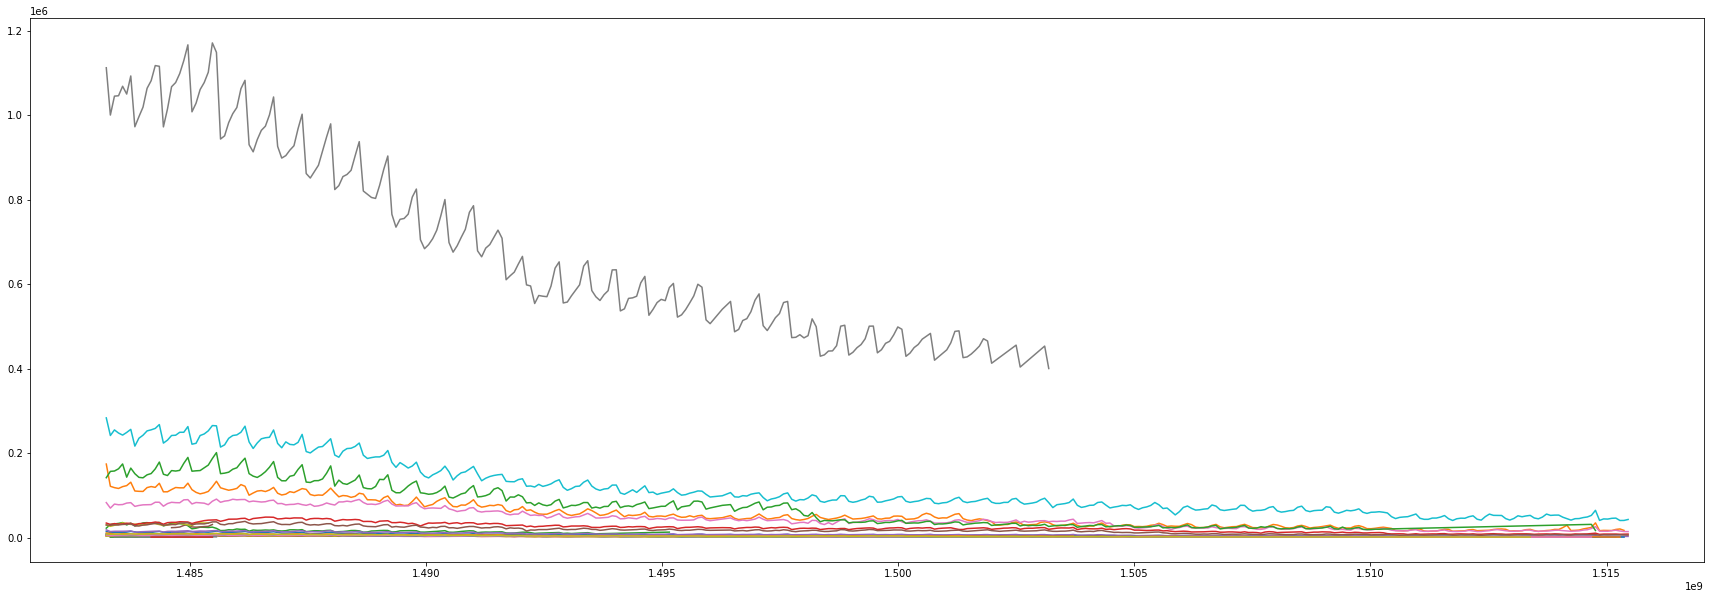

In [205]:
plt.figure(figsize=(30, 10))

for country in song['Region'].unique():
    country_df = song[song['Region'] == country]
    
    timestamps = country_df['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").timestamp())
    plt.plot(timestamps, country_df['Streams'])
plt.show()

##### Groupby country

In [217]:
country = merged_data[merged_data['Region'] == 'global']

In [218]:
country.sort_values('Date')

,Position,Track Name,Artist,Streams,Date,Region,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
1655845,1,Starboy,The Weeknd,3135625,2017-01-01,global,0.1410,0.679,230453.0,0.587,...,7.0,0.1370,-7.015,1.0,84.0,2016-11-25,0.2760,186.003,0.486,2016.0
1655947,143,Weak,AJR,428247,2017-01-01,global,0.1180,0.670,201159.0,0.643,...,5.0,0.1920,-4.553,1.0,71.0,2017-06-09,0.0465,123.979,0.703,2017.0
1655946,142,I Want You Back,The Jackson 5,436184,2017-01-01,global,0.3050,0.469,176333.0,0.538,...,8.0,0.3700,-13.559,1.0,76.0,1969-12-18,0.0571,196.605,0.886,1969.0
1655945,138,Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,440038,2017-01-01,global,0.0291,0.641,258343.0,0.922,...,2.0,0.0862,-4.457,1.0,82.0,2012-10-09,0.0786,146.078,0.847,2012.0
1655944,136,Titanium (feat. Sia),David Guetta,441628,2017-01-01,global,0.0679,0.604,245040.0,0.787,...,0.0,0.1270,-3.674,0.0,67.0,2011-08-26,0.1030,126.062,0.301,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709933,66,Something Just Like This,The Chainsmokers,1041692,2018-01-09,global,0.0498,0.617,247160.0,0.635,...,11.0,0.1640,-6.769,0.0,83.0,2017-04-07,0.0317,103.019,0.446,2017.0
1709934,68,Believer,Imagine Dragons,1010175,2018-01-09,global,0.0622,0.776,204347.0,0.780,...,10.0,0.0810,-4.374,0.0,87.0,2017-06-23,0.1280,124.949,0.666,2017.0
1709935,70,Plain Jane,A$AP Ferg,1008184,2018-01-09,global,0.0651,0.797,173600.0,0.844,...,11.0,0.0870,-5.482,1.0,76.0,2017-08-18,0.2750,170.142,0.520,2017.0
1709957,99,Location,Khalid,822958,2018-01-09,global,0.2830,0.799,217566.0,0.436,...,1.0,0.0968,-9.975,0.0,60.0,2017-10-31,0.3790,80.028,0.311,2017.0


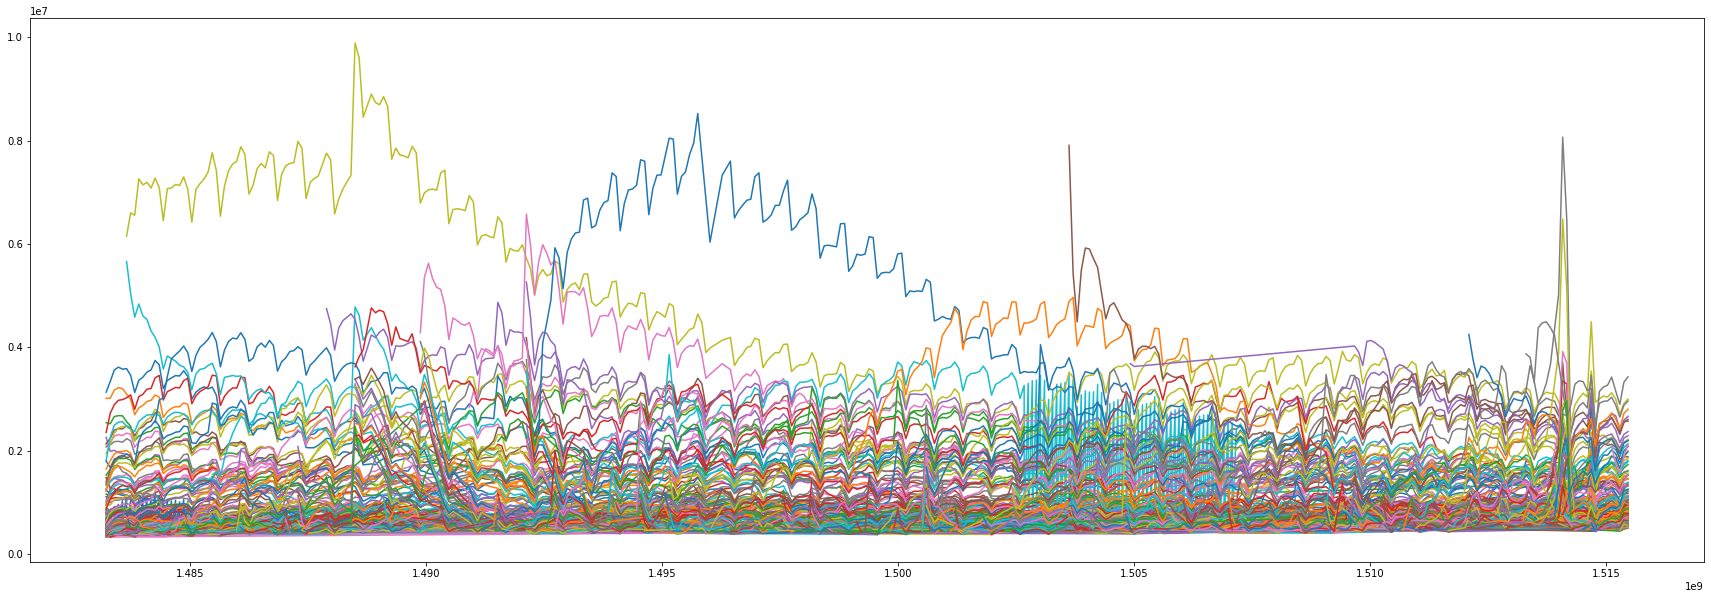

In [219]:
plt.figure(figsize=(30, 10))

for song in country['Track Name'].unique():
    song_df = country[country['Track Name'] == song]
    
    timestamps = song_df['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").timestamp())
    plt.plot(timestamps, song_df['Streams'])
plt.show()